1. ĐỌC FILE DỮ LIỆU VÀ THÊM DỮ LIỆU THÁNG 12 BẰNG CÁCH LẤY TRUNG BÌNH

In [35]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('co2_northern.csv')

2. LÀM SẠCH DỮ LIỆU

In [36]:
# kiểm tra xem có giá trị nan ko
print(df.isnull().sum())

name                         0
country                      0
city_id                      0
start_time                   0
end_time                     0
original_inventory_sector    0
gas                          0
asset_emissions              0
total_emissions              0
dtype: int64


In [37]:
# thay 2 cột month và year vs end và start_time
df['month'] = pd.to_datetime(df['start_time']).dt.month
df['year'] = pd.to_datetime(df['start_time']).dt.year
# cho 2 cột lên đầu
cols = ['month', 'year'] + [col for col in df.columns if col not in ['month', 'year']]
df = df[cols]

In [38]:
df = df.drop(['country','city_id','asset_emissions','start_time','end_time'],axis=1)
df.dtypes

month                          int32
year                           int32
name                          object
original_inventory_sector     object
gas                           object
total_emissions              float64
dtype: object

3. TÍNH TOÁN DỮ LIỆU

In [39]:
#kiểm tra số lượng lĩnh vực gây ra khí nhà kính và 
df['original_inventory_sector'].unique().size
print(df['original_inventory_sector'].unique())
df['gas'].unique()

['aluminum' 'bauxite-mining'
 'biological-treatment-of-solid-waste-and-biogenic' 'cement' 'chemicals'
 'coal-mining' 'copper-mining' 'cropland-fires' 'domestic-aviation'
 'domestic-shipping' 'electricity-generation'
 'enteric-fermentation-cattle-pasture' 'enteric-fermentation-other'
 'fluorinated-gases' 'incineration-and-open-burning-of-waste'
 'international-aviation' 'international-shipping' 'iron-mining'
 'manure-left-on-pasture-cattle' 'manure-management-other'
 'net-forest-land' 'net-shrubgrass' 'net-wetland' 'oil-and-gas-refining'
 'other-agricultural-soil-emissions' 'other-energy-use'
 'other-fossil-fuel-operations' 'other-manufacturing'
 'other-onsite-fuel-usage' 'other-transport' 'pulp-and-paper' 'railways'
 'rice-cultivation' 'road-transportation' 'rock-quarrying'
 'sand-quarrying' 'solid-fuel-transformation' 'solid-waste-disposal'
 'synthetic-fertilizer-application' 'water-reservoirs' 'crop-residues'
 'domestic-wastewater-treatment-and-discharge'
 'enteric-fermentation-cattl

array(['n2o', 'co2', 'ch4', 'co2e_20yr', 'co2e_100yr'], dtype=object)

In [40]:
# Từ điển ánh xạ các lĩnh vực chi tiết vào các ngành
sector_mapping = {
    'aluminum': 'Công nghiệp',
    'bauxite-mining': 'Công nghiệp',
    'biological-treatment-of-solid-waste-and-biogenic': 'Chất thải',
    'cement': 'Công nghiệp',
    'chemicals': 'Công nghiệp',
    'coal-mining': 'Năng lượng',
    'copper-mining': 'Công nghiệp',
    'cropland-fires': 'Nông nghiệp',
    'domestic-aviation': 'Giao thông',
    'domestic-shipping': 'Giao thông',
    'electricity-generation': 'Năng lượng',
    'enteric-fermentation-cattle-pasture': 'Nông nghiệp',
    'enteric-fermentation-other': 'Nông nghiệp',
    'fluorinated-gases': 'Công nghiệp',
    'incineration-and-open-burning-of-waste': 'Chất thải',
    'international-aviation': 'Giao thông',
    'international-shipping': 'Giao thông',
    'iron-mining': 'Công nghiệp',
    'manure-left-on-pasture-cattle': 'Nông nghiệp',
    'manure-management-other': 'Nông nghiệp',
    'net-forest-land': 'Đất đai',
    'net-shrubgrass': 'Đất đai',
    'net-wetland': 'Đất đai',
    'oil-and-gas-refining': 'Năng lượng',
    'other-agricultural-soil-emissions': 'Nông nghiệp',
    'other-energy-use': 'Năng lượng',
    'other-fossil-fuel-operations': 'Năng lượng',
    'other-manufacturing': 'Công nghiệp',
    'other-onsite-fuel-usage': 'Năng lượng',
    'other-transport': 'Giao thông',
    'pulp-and-paper': 'Công nghiệp',
    'railways': 'Giao thông',
    'rice-cultivation': 'Nông nghiệp',
    'road-transportation': 'Giao thông',
    'rock-quarrying': 'Công nghiệp',
    'sand-quarrying': 'Công nghiệp',
    'solid-fuel-transformation': 'Năng lượng',
    'solid-waste-disposal': 'Chất thải',
    'synthetic-fertilizer-application': 'Nông nghiệp',
    'water-reservoirs': 'Đất đai',
    'crop-residues': 'Nông nghiệp',
    'domestic-wastewater-treatment-and-discharge': 'Chất thải',
    'enteric-fermentation-cattle-operation': 'Nông nghiệp',
    'food-beverage-tobacco': 'Công nghiệp',
    'glass': 'Công nghiệp',
    'heat-plants': 'Năng lượng',
    'industrial-wastewater-treatment-and-discharge': 'Chất thải',
    'iron-and-steel': 'Công nghiệp',
    'lime': 'Công nghiệp',
    'manure-applied-to-soils': 'Nông nghiệp',
    'manure-management-cattle-operation': 'Nông nghiệp',
    'non-residential-onsite-fuel-usage': 'Năng lượng',
    'oil-and-gas-production': 'Năng lượng',
    'oil-and-gas-transport': 'Giao thông',
    'other-chemicals': 'Công nghiệp',
    'other-metals': 'Công nghiệp',
    'other-mining-quarrying': 'Công nghiệp',
    'petrochemical-steam-cracking': 'Công nghiệp',
    'residential-onsite-fuel-usage': 'Năng lượng',
    'textiles-leather-apparel': 'Công nghiệp',
    'wood-and-wood-products': 'Công nghiệp'
}

# Ánh xạ lĩnh vực chi tiết thành ngành
df['main_sector'] = df['original_inventory_sector'].map(sector_mapping)

# Kiểm tra kết quả và xóa cột cũ
df = df.drop(['original_inventory_sector'], axis=1)

# Kiểm tra DataFrame sau khi thực hiện ánh xạ và xóa cột cũ
print(df.head())


   month  year name         gas  total_emissions  main_sector
0      1  2021  Chũ         n2o              0.0  Công nghiệp
1      1  2021  Chũ         co2              0.0  Công nghiệp
2      1  2021  Chũ         ch4              0.0  Công nghiệp
3      1  2021  Chũ   co2e_20yr              0.0  Công nghiệp
4      1  2021  Chũ  co2e_100yr              0.0  Công nghiệp


In [41]:
# Nhóm dữ liệu và tính tổng các cột emissions
df.loc[df['gas']=='ch4','total_emissions'] *=80 #đơn vị quy đội gwp
df.loc[df['gas']=='n2o','total_emissions'] *=273
grouped = df[df['gas']!='co2e_100yr'].groupby(['month', 'year', 'name', 'gas', 'main_sector'])['total_emissions'].sum().round(2).reset_index()
grouped.to_csv('co2_nothern_clean.csv',index=False)
# xoá các hàng có giá gas = co2e_100yr do phân tích ngắn hạn
grouped_year = grouped.groupby(['year','gas'])['total_emissions'].sum().round(2).reset_index(name='emissions_gas')
# quy đổi đơn vị về co2e_20yr
grouped_year

,year,gas,emissions_gas
0,2021,ch4,35931184.02
1,2021,co2,38731777.13
2,2021,co2e_20yr,78055686.68
3,2021,n2o,867807.00
4,2022,ch4,34715035.16
5,2022,co2,37015738.21
6,2022,co2e_20yr,75118738.73
7,2022,n2o,880718.02
8,2023,ch4,32943957.16
9,2023,co2,41266863.25


In [42]:
# Pivot dữ liệu để tạo các cột cho ch4, co2, n2o và co2e_20yr theo năm
pivoted = grouped_year.pivot(index='year', columns='gas', values='emissions_gas').reset_index()
# In kết quả
pivoted['other_GHGs'] = pivoted['co2e_20yr']-pivoted['co2']-pivoted['ch4']-pivoted['n2o']
pivoted

gas,year,ch4,co2,co2e_20yr,n2o,other_GHGs
0,2021,35931184.02,38731777.13,78055686.68,867807.00,2524918.53
1,2022,34715035.16,37015738.21,75118738.73,880718.02,2507247.34
2,2023,32943957.16,41266863.25,77596625.53,905493.26,2480311.86
3,2024,32926217.28,42098048.58,78513352.01,908802.17,2580283.98


In [43]:
grouped_sector = grouped[grouped['gas']=='co2e_20yr'].groupby(['main_sector','year'])['total_emissions'].sum().round(2).reset_index(name='emissions_sector')
grouped_sector

,main_sector,year,emissions_sector
0,Chất thải,2021,6296097.18
1,Chất thải,2022,6307046.39
2,Chất thải,2023,6379656.23
3,Chất thải,2024,6449796.69
4,Công nghiệp,2021,12373314.00
5,Công nghiệp,2022,11722791.34
6,Công nghiệp,2023,12417265.50
7,Công nghiệp,2024,12493000.51
8,Giao thông,2021,6984078.83
9,Giao thông,2022,8758603.77


In [44]:
# tính toán các khí theo từng ngành
summary = grouped.groupby(['gas', 'main_sector'])['total_emissions'].sum().reset_index()
summary = summary.pivot(index='main_sector',columns='gas',values='total_emissions')
summary.columns.name = None
summary.reset_index(inplace=True)
summary['other_GHGs'] = (summary['co2e_20yr']-summary['co2']-summary['ch4']-summary['n2o'])
summary

,main_sector,ch4,co2,co2e_20yr,n2o,other_GHGs
0,Chất thải,24468955.40,26096.52,2.543260e+07,705464.43,232080.14
1,Công nghiệp,288156.33,40321506.90,4.900637e+07,222529.17,8174178.95
2,Giao thông,240130.37,34028366.95,3.459863e+07,322652.50,7479.31
3,Nông nghiệp,32847574.49,13790008.54,4.902662e+07,1896630.51,492402.28
4,Năng lượng,78158840.34,70452872.66,1.502062e+08,415543.84,1178929.94
5,Đất đai,512736.69,493575.60,1.014003e+06,0.00,7691.09


4. VẼ BIỂU ĐỒ

In [45]:
import plotly.express as px
import pandas as pd

# Chuyển dữ liệu sang dạng dài (long format) để Plotly dễ vẽ
df_long = pivoted.melt(id_vars=['year'], value_vars=['ch4', 'co2', 'n2o', 'other_GHGs'], 
                  var_name='gas', value_name='emissions')

# Tạo biểu đồ cột động
fig = px.bar(df_long, x='year', y='emissions', color='gas',
             title='Lượng khí phát thải nhà kính theo từng năm',
             labels={'emissions': 'Emissions', 'year': 'Year', 'gas': 'Gas'},
             barmode='group')  # 'group' để các cột của mỗi năm không bị chồng lên nhau
fig.show()

In [46]:
# Tạo biểu đồ cột động
fig = px.bar(grouped_sector,
             x='year',
             y='emissions_sector',
             color='main_sector',
             barmode='group',
             title='Lượng phát thải từng ngành theo năm',
             labels={'emissions_sector': 'Lượng phát thải (tấn CO₂e)', 'year': 'Năm'},
             hover_data={'emissions_sector': ':.2f'})

# Tùy chỉnh giao diện biểu đồ
fig.update_layout(
    xaxis_title='Năm',
    yaxis_title='Lượng phát thải (tấn CO₂e)',
    legend_title='Ngành',
    hovermode="x unified"
)


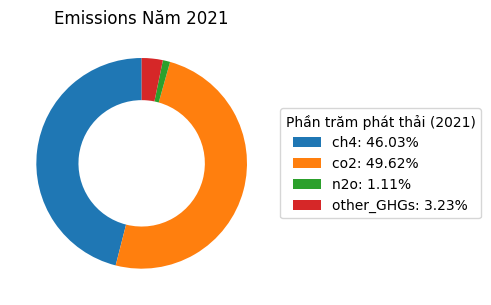

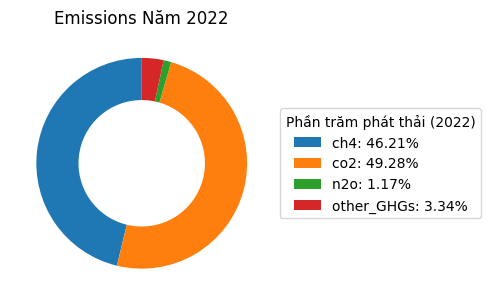

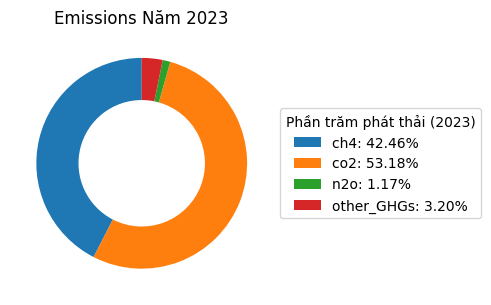

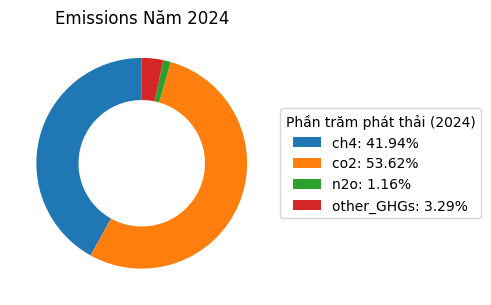

In [47]:
# Lặp qua từng năm trong dữ liệu
for year in grouped_sector['year'].unique():  
    # Lọc dữ liệu theo năm
    data_year = pivoted[pivoted['year'] == year].drop(['year', 'co2e_20yr'], axis=1).squeeze()
    # Tính phần trăm của từng loại khí
    percentages = (data_year / data_year.sum()) * 100
    # Vẽ biểu đồ donut cho năm hiện tại
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.pie(data_year, 
           startangle=90, 
           wedgeprops={'width': 0.4},  # Tạo khoảng trống ở giữa để thành hình donut
           labels=None)  # Không hiển thị nhãn trực tiếp trên biểu đồ
    # Tạo danh sách chú thích với tên khí và phần trăm
    legend_labels = [f"{gas}: {percent:.2f}%" for gas, percent in zip(data_year.index, percentages)]
    # Thêm chú thích (legend) với phần trăm
    ax.legend(legend_labels, title=f"Phần trăm phát thải ({year})", loc="center left", bbox_to_anchor=(1, 0.5))
    ax.set_title(f'Emissions Năm {year}')
    plt.tight_layout()
    plt.show()

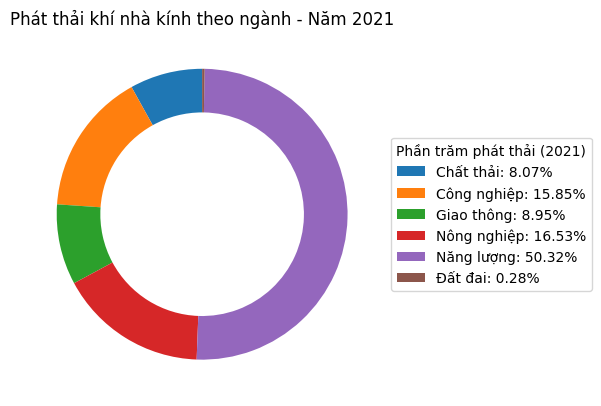

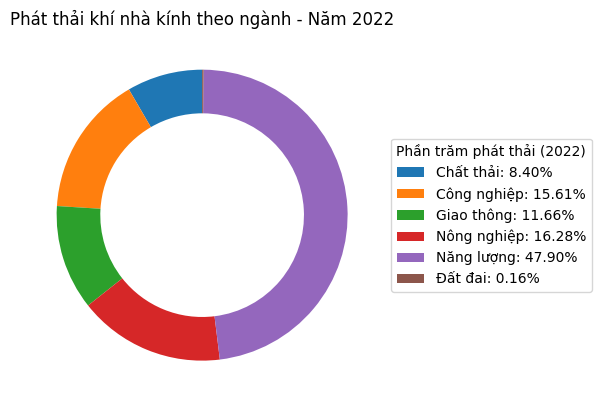

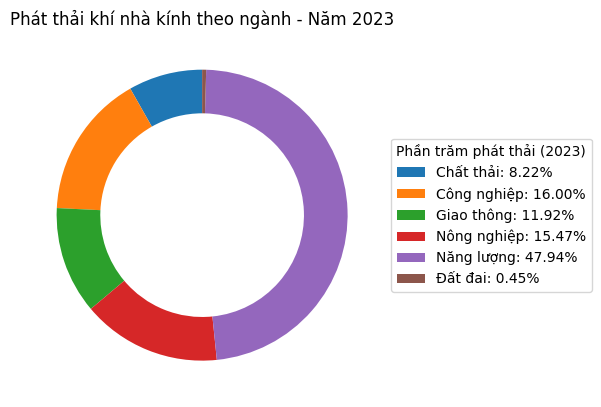

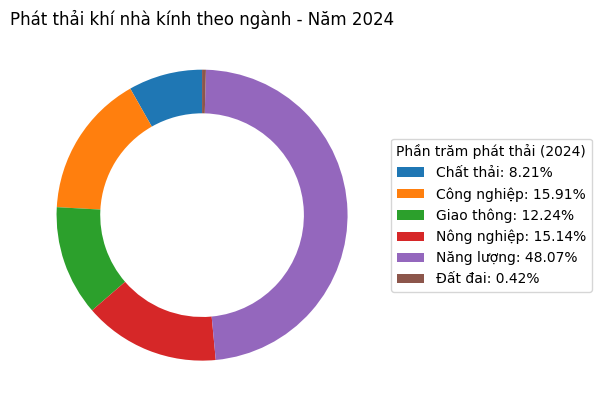

In [48]:
# Vẽ biểu đồ donut cho từng năm
for year in grouped_sector['year'].unique():  # Lấy danh sách các năm duy nhất
    # Lọc dữ liệu theo năm
    data_year = grouped_sector[grouped_sector['year'] == year]
    emissions = data_year['emissions_sector']
    sectors = data_year['main_sector']

    # Tính phần trăm
    percentages = (emissions / emissions.sum()) * 100

    # Vẽ biểu đồ donut
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.pie(emissions, 
           startangle=90, 
           wedgeprops={'width': 0.3},  # Tạo khoảng trống ở giữa để thành hình donut
           labels=None)  # Không hiển thị nhãn trực tiếp trên biểu đồ

    # Tạo danh sách chú thích với tên ngành và phần trăm
    legend_labels = [f"{sector}: {percent:.2f}%" for sector, percent in zip(sectors, percentages)]

    # Thêm chú thích (legend) với phần trăm
    ax.legend(legend_labels, title=f"Phần trăm phát thải ({year})", loc="center left", bbox_to_anchor=(1, 0.5))

    # Đặt tiêu đề cho biểu đồ
    ax.set_title(f'Phát thải khí nhà kính theo ngành - Năm {year}')

    # Hiển thị biểu đồ
    plt.tight_layout()
    plt.show()


In [49]:
df_long = summary.drop('co2e_20yr',axis=1).melt(id_vars='main_sector', var_name='gas', value_name='total_emissions')
# Vẽ biểu đồ cột động
fig = px.bar(
    df_long,
    x='main_sector',
    y='total_emissions',
    color='gas',
    title='Tổng lượng phát thải của các khí theo các ngành',
    labels={'main_sector': 'Lĩnh vực', 'total_emissions': 'Lượng phát thải', 'gas': 'Loại khí'},
    barmode='group',
    hover_data=['total_emissions']
)
fig.show()
summary

,main_sector,ch4,co2,co2e_20yr,n2o,other_GHGs
0,Chất thải,24468955.40,26096.52,2.543260e+07,705464.43,232080.14
1,Công nghiệp,288156.33,40321506.90,4.900637e+07,222529.17,8174178.95
2,Giao thông,240130.37,34028366.95,3.459863e+07,322652.50,7479.31
3,Nông nghiệp,32847574.49,13790008.54,4.902662e+07,1896630.51,492402.28
4,Năng lượng,78158840.34,70452872.66,1.502062e+08,415543.84,1178929.94
5,Đất đai,512736.69,493575.60,1.014003e+06,0.00,7691.09


5. TƯƠNG QUAN

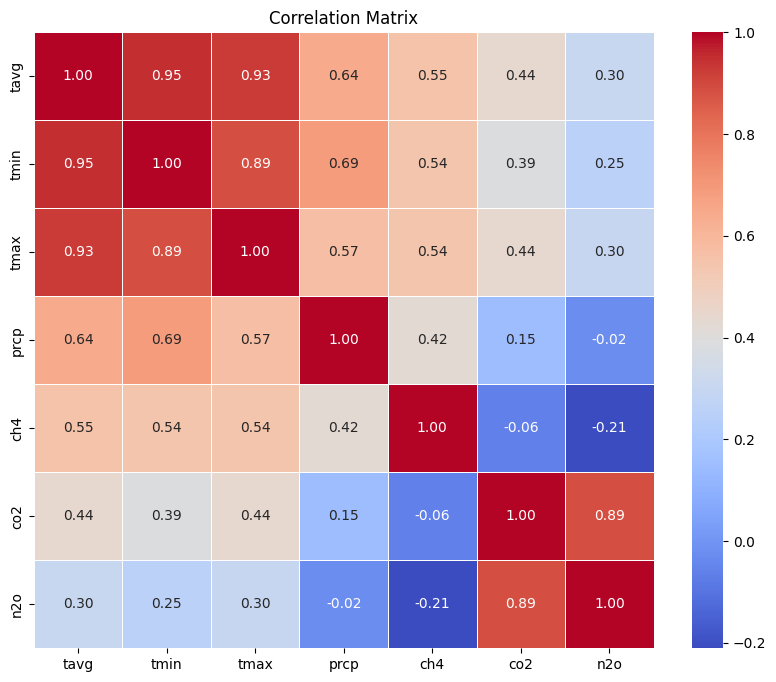

In [50]:
df_emissions_month = df[df['gas'].isin(['ch4','n2o','co2','co2e_20yr'])].groupby(['month', 'year','gas'])['total_emissions'].sum().reset_index()
df_emissions_month = df_emissions_month.pivot_table(index=['month', 'year'], columns='gas', values='total_emissions', aggfunc='sum').reset_index()
df_emissions_month.columns.name = None
corr = pd.read_csv('correlate.csv')
corr = corr.merge(df_emissions_month,on=['year','month'],how='inner')
corr.to_csv('correlate.csv',index=False)
correlation_matrix = corr.drop(['year','month','co2e_20yr'],axis=1).corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))  # Kích thước biểu đồ
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Thêm tiêu đề
plt.title('Correlation Matrix')

# Hiển thị biểu đồ
plt.show()


<Axes: ylabel='total_emissions'>

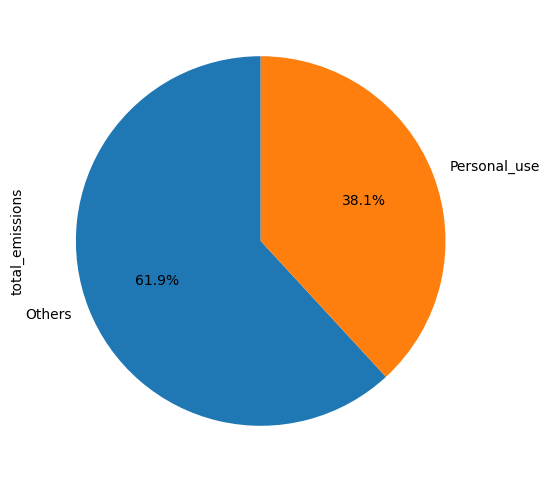

In [51]:
df1 = pd.read_csv('co2_northern.csv')
personal_sectors = [
    'domestic-aviation',
    'road-transportation',
    'residential-onsite-fuel-usage',
    'railways',
    'textiles-leather-apparel',
    'food-beverage-tobacco',
    'glass',
    'wood-and-wood-products',
    'solid-waste-disposal',
    'domestic-wastewater-treatment-and-discharge',
    'incineration-and-open-burning-of-waste',
    'crop-residues',
    'manure-applied-to-soils',
    'synthetic-fertilizer-application',
    'manure-management-cattle-operation',
    'electricity-generation',
    'heat-plants',
    'domestic-shipping',
    'other-onsite-fuel-usage',
    'fluorinated-gases'
]
sector_mapping = {sector: 'Personal_use' if sector in personal_sectors else 'Others' for sector in df1['original_inventory_sector'].unique()}
df1['main_sector'] = df1['original_inventory_sector'].map(sector_mapping)
df1 = df1.drop(['original_inventory_sector'], axis=1)
general = df1[df1['gas']=='co2e_20yr'].groupby('main_sector')['total_emissions'].sum().reset_index()
general.set_index('main_sector')['total_emissions'].plot(kind='pie', figsize=(6,6), autopct='%1.1f%%', startangle=90)

